# Kata Kunci Berita


Mencari dokumen melalui kata kunci dapat mempermudah kita dalam mencari suatu dokumen yang relevan. Kata Kunci merupakan kata yang penting dan sering muncul dalam sebuah teks maupun dokumen. Biasanya kata kunci mengandung kata yang unik, dan bermakna spesifik.


## Proses Pembersihan Teks


### Import Library


In [61]:
# Library untuk text preprocessing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

import string

# Library untuk data manipulation
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from tqdm import tqdm

# Library untuk text similarity
from sklearn.metrics.pairwise import cosine_similarity 

### Load Data


In [62]:
data = pd.read_csv('../antaranews.csv')
data

,title,content,image,url,category,source
0,Gus Ipul tanggalkan jabatan Wali Kota Pasuruan,"\n""Per hari ini juga saya mundur sebagai Wali ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324327/gus-...,Politik,antaranews
1,Presiden Jokowi lantik Aida Suwandi jadi Anggo...,"\n""Demi Allah saya bersumpah bahwa saya tidak ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324243/pres...,Politik,antaranews
2,Presiden Jokowi lantik Eddy Hartono jadi Kepal...,"\n""Demi Allah saya bersumpah bahwa saya akan s...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324219/pres...,Politik,antaranews
3,Wakil KSAD tetapkan 500 warga sipil sebagai ko...,"\n“Dengan mengucap Bismillahirrahmanirrahim, p...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324191/waki...,Politik,antaranews
4,"Relawan Prabowo-Gibran: Gerakan ""tusuk 3 paslo...",\nJakarta (ANTARA) - Koordinator Nasional Prab...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324179/rela...,Politik,antaranews
...,...,...,...,...,...,...
137,OJK: Semua bank miliki sistem deteksi rekening...,\nKami meminta bank untuk meneliti lebih lanju...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322531/ojk-...,Ekonomi,antaranews
138,PT PAL rampungkan “docking refurbishment” KRI ...,\nSurabaya (ANTARA) - PT PAL Indonesia telah m...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322475/pt-p...,Ekonomi,antaranews
139,Rupiah datar di tengah pasar antisipasi data i...,\nJakarta (ANTARA) - Nilai tukar (kurs) rupiah...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322419/rupi...,Ekonomi,antaranews
140,PGN: Pembayaran tagihan jargas dapat melalui a...,"\nJakarta (ANTARA) - PT PGN Tbk (PGN), selaku ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322379/pgn-...,Ekonomi,antaranews


### Preprocessing Text


In [67]:
def clean_text(text):
	# make text lowercase
	text = text.lower() 

	# remove line breaks
	text = re.sub(r'\n', ' ', text)

	# remove puctuation
	translator = str.maketrans('', '', string.punctuation)
	text = text.translate(translator)

		# remove numbers
	text = re.sub(r'\d+', '', text)

	# remove extra spaces 
	text = re.sub(r'\s+', ' ', text)

	# remove non-ascii characters
	text = re.sub(r'[^\x00-\x7F]+', ' ', text)

	return text

def clean_stopword(tokens):
	listStopword =  set(stopwords.words('indonesian'))
	filtered_words = [word for word in tokens if word.lower() not in listStopword]
	return filtered_words

Membersihkan text dari tanda baca yang ada, kemudian menyesuaikan text agar bisa diolah lebih lanjut.


In [68]:
def preprocess_text(content):
	result = {}
	for i, text in enumerate(tqdm(content)):
		cleaned_text = clean_text(text)
		tokens = word_tokenize(cleaned_text)
		cleaned_stopword = clean_stopword(tokens)
		result[i] = ' '.join(cleaned_stopword)
	return result

data['cleaned_news'] = preprocess_text(data['content'])
data

100%|██████████| 142/142 [00:00<00:00, 142.89it/s]


,title,content,image,url,category,source,cleaned_news
0,Gus Ipul tanggalkan jabatan Wali Kota Pasuruan,"\n""Per hari ini juga saya mundur sebagai Wali ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324327/gus-...,Politik,antaranews,mundur wali kota pasuruan otomatis itujakarta ...
1,Presiden Jokowi lantik Aida Suwandi jadi Anggo...,"\n""Demi Allah saya bersumpah bahwa saya tidak ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324243/pres...,Politik,antaranews,allah bersumpah menerima langsung apapun langs...
2,Presiden Jokowi lantik Eddy Hartono jadi Kepal...,"\n""Demi Allah saya bersumpah bahwa saya akan s...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324219/pres...,Politik,antaranews,allah bersumpah setia uud negara ri menjalanka...
3,Wakil KSAD tetapkan 500 warga sipil sebagai ko...,"\n“Dengan mengucap Bismillahirrahmanirrahim, p...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324191/waki...,Politik,antaranews,mengucap bismillahirrahmanirrahim rabu tanggal...
4,"Relawan Prabowo-Gibran: Gerakan ""tusuk 3 paslo...",\nJakarta (ANTARA) - Koordinator Nasional Prab...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4324179/rela...,Politik,antaranews,jakarta koordinator nasional prabowogibran dig...
...,...,...,...,...,...,...,...
137,OJK: Semua bank miliki sistem deteksi rekening...,\nKami meminta bank untuk meneliti lebih lanju...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322531/ojk-...,Ekonomi,antaranews,bank meneliti rekeningrekening laporan keuanga...
138,PT PAL rampungkan “docking refurbishment” KRI ...,\nSurabaya (ANTARA) - PT PAL Indonesia telah m...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322475/pt-p...,Ekonomi,antaranews,surabaya pt pal indonesia menyelesaikan dockin...
139,Rupiah datar di tengah pasar antisipasi data i...,\nJakarta (ANTARA) - Nilai tukar (kurs) rupiah...,https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322419/rupi...,Ekonomi,antaranews,jakarta nilai tukar kurs rupiah dolar as perda...
140,PGN: Pembayaran tagihan jargas dapat melalui a...,"\nJakarta (ANTARA) - PT PGN Tbk (PGN), selaku ...",https://img.antaranews.com/cache/1200x800/2024...,https://www.antaranews.com/berita/4322379/pgn-...,Ekonomi,antaranews,jakarta pt pgn tbk pgn subholding gas pt perta...


### Memisahkan Kalimat menjadi per Kata


In [69]:
kalimat = nltk.sent_tokenize(data['cleaned_news'][4])
kalimat = [sentence.replace('.', '') for sentence in kalimat]
kata = nltk.word_tokenize(data['cleaned_news'][4])
kata = list(set(k for k in kata if k != '.'))

In [70]:
kalimat

['jakarta koordinator nasional prabowogibran digital team pride anthony leong munculnya ajakan gerakan mencoblos pasangan calon paslon tusuk paslon menjelang pilkada jakarta berpotensi merusak proses demokrasi anthony khawatir munculnya gerakan membodohi masyarakat produktif pilkada sarana pendidikan politik masyarakat ajang gerakangerakan produktif anthony jakarta rabu pilkada jakarta diikuti pasangan calon paslon pramono anungrano karno dharma pongrekunkun wardana ridwan kamilsuswono baca anggaran rw tingkatkan kesejahteraan warga baca pramdoel usung program masyarakat menengah baca dharmakun kaji terkait desain ulang tata kota jakarta bertahap gerakan mengarahkan masyarakat menciptakan surat suara sah berdampak buruk dibandingkan aksi golput momen pilkada mengajak masyarakat jakarta menentukan pilihannya mengarahkan surat suara sah ide diikuti cederai proses demokrasi indonesia mengimbau warga jakarta hak pilihnya bijak menentukan pemimpin kota perhatikan programprogram ketiga pasan

In [71]:
kata

['tusuk',
 'pramono',
 'mengarahkan',
 'pilkada',
 'baca',
 'program',
 'nasional',
 'aksi',
 'ulang',
 'tingkatkan',
 'pilihnya',
 'produktif',
 'pride',
 'leong',
 'ddj',
 'sah',
 'wardana',
 'demokrasi',
 'rw',
 'paslon',
 'maju',
 'dharma',
 'pilihannya',
 'dharmakun',
 'calon',
 'usung',
 'kamilsuswono',
 'pilihlah',
 'kaji',
 'cederai',
 'buruk',
 'nurani',
 'bijak',
 'dibandingkan',
 'indonesia',
 'rabu',
 'menekan',
 'hak',
 'pasangan',
 'ridwan',
 'berjalan',
 'kaum',
 'anggaran',
 'munculnya',
 'berpotensi',
 'mengimbau',
 'programprogram',
 'pramdoel',
 'jakarta',
 'menengah',
 'muda',
 'desain',
 'angka',
 'samping',
 'berdampak',
 'rizaldieditor',
 'diikuti',
 'surat',
 'ajang',
 'menciptakan',
 'ahmad',
 'mengajak',
 'karno',
 'pemimpin',
 'aktif',
 'kliwantorocopyright',
 'koordinator',
 'prabowogibran',
 'suara',
 'golput',
 'gerakan',
 'merusak',
 'pendidikan',
 'golputpewarta',
 'proses',
 'sarana',
 'kesejahteraan',
 'khawatir',
 'terkait',
 'ajakan',
 'mencoblos',
 

## Membuat Matriks


### Occurrence matrix


Menghitung frekuensi kemunculan kata dalam kumpulan teks.


In [72]:
def vektor_kata(data):
	vektor_kata = pd.DataFrame(0, index=range(len(data)), columns=kata)
	
	for i, sent in enumerate(data):
		# Tokenisasi kalimat menjadi kata-kata
		kata_kalimat = word_tokenize(sent)
		
		# Hitung frekuensi setiap kata dalam kalimat
		for word in kata_kalimat:
			if word in kata:
				vektor_kata.at[i, word] += 1

	return vektor_kata

In [73]:
df_vektor_kata = vektor_kata(kalimat)
df_vektor_kata

,tusuk,pramono,mengarahkan,pilkada,baca,program,nasional,aksi,ulang,tingkatkan,...,perhatikan,anthony,anungrano,masyarakat,warga,ketiga,pongrekunkun,menentukan,momen,kota
0,1,1,2,4,3,1,1,1,1,1,...,1,4,1,5,2,1,1,2,1,3


### Hasil Kata Kunci


In [74]:
sorted_kata = df_vektor_kata.sum().sort_values(ascending=False)[:3]
print(", ".join(sorted_kata.index))

jakarta, masyarakat, pilkada


### Co-occurrence Matrix


# Co-occurrence Matrix

## Apa itu Co-occurrence Matrix?
Co-occurrence matrix adalah sebuah matriks yang digunakan untuk merepresentasikan frekuensi kemunculan sepasang objek (biasanya kata) dalam sebuah konteks tertentu, seperti kalimat, paragraf, atau dokumen. Matriks ini sangat berguna dalam analisis teks dan sering digunakan dalam bidang *Natural Language Processing* (NLP) untuk memahami hubungan antara kata-kata dalam suatu kumpulan data teks.

## Cara Kerja
Co-occurrence matrix dibentuk dengan menghitung seberapa sering sepasang kata muncul bersama-sama dalam suatu konteks tertentu. Setiap baris dan kolom pada matriks mewakili satu kata dalam korpus (kumpulan teks), dan nilai pada sel menunjukkan jumlah kemunculan dua kata (baris dan kolom) dalam konteks yang sama.

### Contoh:
Misalkan kita memiliki teks sederhana berikut:
ibu pergi ke pasar ayah pergi ke kantor


Dari kalimat-kalimat tersebut, kita dapat membuat co-occurrence matrix sebagai berikut:

|       | ibu | pergi | ke  | pasar | ayah | kantor |
|-------|-----|-------|-----|-------|------|--------|
| ibu   | 0   | 1     | 1   | 1     | 0    | 0      |
| pergi | 1   | 0     | 2   | 1     | 1    | 1      |
| ke    | 1   | 2     | 0   | 1     | 1    | 1      |
| pasar | 1   | 1     | 1   | 0     | 0    | 0      |
| ayah  | 0   | 1     | 1   | 0     | 0    | 1      |
| kantor| 0   | 1     | 1   | 0     | 1    | 0      |

Pada matriks di atas:
- Baris dan kolom masing-masing mewakili kata-kata dari korpus teks.
- Nilai di dalam sel menunjukkan jumlah kemunculan sepasang kata dalam satu konteks (misalnya, satu kalimat).

### Interpretasi
- Misalnya, nilai pada sel `(ibu, pergi)` adalah 1, yang berarti kata "ibu" dan "pergi" muncul bersama satu kali dalam korpus teks.
- Sel `(ayah, kantor)` bernilai 1, yang berarti kata "ayah" dan "kantor" muncul bersama sekali.

## Aplikasi
Co-occurrence matrix dapat digunakan untuk:
1. **Pembelajaran Representasi Kata**: Teknik seperti *Word2Vec* dan *GloVe* menggunakan informasi co-occurrence untuk menghasilkan vektor representasi kata yang berguna dalam berbagai tugas NLP.
2. **Analisis Jaringan Sosial**: Dapat digunakan untuk mengidentifikasi hubungan antar entitas dalam sebuah jaringan.
3. **Rekomendasi Produk**: Dalam *e-commerce*, co-occurrence matrix digunakan untuk mengetahui produk mana yang sering dibeli bersama, yang membantu dalam sistem rekomendasi.

## Keterbatasan
1. **Dimensionalitas Tinggi**: Jika korpus teks sangat besar, jumlah kata yang unik akan besar, sehingga co-occurrence matrix dapat menjadi sangat besar dan sulit dikelola.
2. **Sparsity**: Co-occurrence matrix biasanya sangat jarang (*sparse*), karena kebanyakan kata-kata tidak sering muncul bersama.



In [75]:
def create_cooccurrence_matrix(data):
	vektor_kata = pd.DataFrame(0, index=kata, columns=kata)

	for sent in data:
		kata_kalimat = word_tokenize(sent)
		for i in range(len(kata_kalimat)-1):
			vektor_kata.at[kata_kalimat[i], kata_kalimat[i+1]] += 1
			vektor_kata.at[kata_kalimat[i+1], kata_kalimat[i]] += 1
	
	return vektor_kata

print(kalimat)

cooccurrence_matrix = create_cooccurrence_matrix(kalimat)
cooccurrence_matrix

['jakarta koordinator nasional prabowogibran digital team pride anthony leong munculnya ajakan gerakan mencoblos pasangan calon paslon tusuk paslon menjelang pilkada jakarta berpotensi merusak proses demokrasi anthony khawatir munculnya gerakan membodohi masyarakat produktif pilkada sarana pendidikan politik masyarakat ajang gerakangerakan produktif anthony jakarta rabu pilkada jakarta diikuti pasangan calon paslon pramono anungrano karno dharma pongrekunkun wardana ridwan kamilsuswono baca anggaran rw tingkatkan kesejahteraan warga baca pramdoel usung program masyarakat menengah baca dharmakun kaji terkait desain ulang tata kota jakarta bertahap gerakan mengarahkan masyarakat menciptakan surat suara sah berdampak buruk dibandingkan aksi golput momen pilkada mengajak masyarakat jakarta menentukan pilihannya mengarahkan surat suara sah ide diikuti cederai proses demokrasi indonesia mengimbau warga jakarta hak pilihnya bijak menentukan pemimpin kota perhatikan programprogram ketiga pasan

,tusuk,pramono,mengarahkan,pilkada,baca,program,nasional,aksi,ulang,tingkatkan,...,perhatikan,anthony,anungrano,masyarakat,warga,ketiga,pongrekunkun,menentukan,momen,kota
tusuk,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pramono,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
mengarahkan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
pilkada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
baca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ketiga,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pongrekunkun,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
menentukan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
momen,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Cosine Similarity


In [76]:
cossim = cosine_similarity(cooccurrence_matrix)

#### Graph


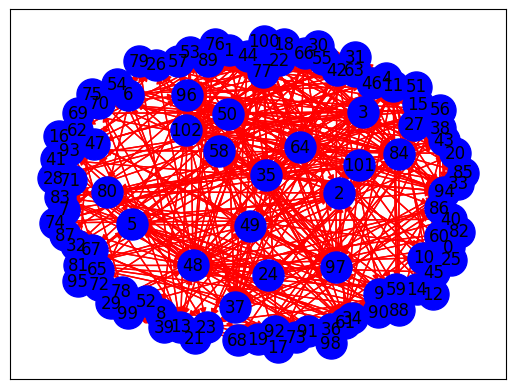

In [77]:
G = nx.DiGraph()
for i in range(len(cossim)):
    G.add_node(i)

for i in range(len(cossim)):
    for j in range(len(cossim)):
        similarity = cossim[i][j]
        if similarity > 0.1 and i != j:
            G.add_edge(i, j)

pos = nx.spring_layout(G, k=2)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='b')
nx.draw_networkx_edges(G, pos, edge_color='red', arrows=True)
nx.draw_networkx_labels(G, pos)

plt.show()

In [78]:
pagerank = nx.pagerank(G)

sorted_pagerank= sorted(pagerank.items(), key=lambda x: x[1], reverse=True)
print("Page Rank :")
for node, pagerank in sorted_pagerank:
    print(f"Node {node}: {pagerank:.4f}")

Page Rank :
Node 48: 0.0406
Node 96: 0.0246
Node 94: 0.0241
Node 97: 0.0224
Node 61: 0.0203
Node 56: 0.0201
Node 35: 0.0199
Node 11: 0.0194
Node 3: 0.0194
Node 84: 0.0186
Node 102: 0.0182
Node 100: 0.0161
Node 2: 0.0160
Node 49: 0.0157
Node 17: 0.0156
Node 66: 0.0155
Node 31: 0.0154
Node 37: 0.0150
Node 64: 0.0149
Node 44: 0.0149
Node 50: 0.0147
Node 4: 0.0142
Node 88: 0.0138
Node 83: 0.0119
Node 59: 0.0113
Node 5: 0.0111
Node 81: 0.0109
Node 38: 0.0108
Node 77: 0.0108
Node 13: 0.0108
Node 24: 0.0106
Node 70: 0.0105
Node 12: 0.0105
Node 58: 0.0099
Node 55: 0.0099
Node 60: 0.0097
Node 53: 0.0096
Node 80: 0.0095
Node 29: 0.0094
Node 101: 0.0093
Node 26: 0.0093
Node 79: 0.0093
Node 63: 0.0090
Node 23: 0.0089
Node 86: 0.0087
Node 89: 0.0086
Node 42: 0.0086
Node 87: 0.0085
Node 22: 0.0084
Node 75: 0.0084
Node 73: 0.0082
Node 43: 0.0081
Node 47: 0.0081
Node 1: 0.0080
Node 74: 0.0079
Node 76: 0.0078
Node 93: 0.0078
Node 40: 0.0076
Node 20: 0.0075
Node 19: 0.0073
Node 45: 0.0071
Node 52: 0.006

#### Hasil Kata Kunci


In [79]:
print("Tiga Node Tertinggi Page Rank :")
sentence = ""
for node, pagerank in sorted_pagerank[:3]:
  top_sentence = kata[node]
  sentence += top_sentence + ", "
  print(f"Node {node}: Page Rank = {pagerank:.4f}")
  print(f"Kalimat: {top_sentence}")

Tiga Node Tertinggi Page Rank :
Node 48: Page Rank = 0.0406
Kalimat: jakarta
Node 96: Page Rank = 0.0246
Kalimat: masyarakat
Node 94: Page Rank = 0.0241
Kalimat: anthony
